In [62]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

import warnings
warnings.filterwarnings(action='ignore')  # 경고 메시지를 무시



In [63]:
df_one = pd.read_csv('data/성별_연령별_교육정도별_1인가구_일반가구_시군구_20250625112008.csv')
df_one_2024 = df_one.iloc[3]
df_one_2024

행정구역별(시군구)        전국
성별                 계
연령별            20~24
2020          496119
2020.1             -
2020.2          2507
2020.3         84389
2020.4         92363
2020.5        307180
2020.6          9680
2020.7             -
Name: 3, dtype: object

In [64]:
df_one = df_one[df_one['행정구역별(시군구)'] != '동부']
df_one.value_counts()

행정구역별(시군구)  성별  연령별     2020    2020.1  2020.2  2020.3  2020.4     2020.5      2020.6  2020.7      
강원도         계   20~24   23355   -       29      2950    3168       16940       268     -               1
                20세 미만  3110    -       78      892     342        1798        -       -               1
                25~29   19192   -       40      2528    3318       11823       1483    -               1
                30~34   13660   -       102     2030    2252       7927        1349    -               1
                35~39   11306   -       215     2687    2363       4850        1191    -               1
                                                                                                      ..
충청북도        여자  75~79   10261   5196    822     500     50         90          20      3583            1
                80~84   9093    3957    446     273     31         48          5       4333            1
                85세 이상  6559    2523    182     141     6   

In [65]:
# 컬럼 이름 변경을 위한 매핑 딕셔너리 정의
column_mapping = {
    '2020': '1인가구',
    '2020.1': '초등학교',
    '2020.2': '중학교',
    '2020.3': '고등학교',
    '2020.4': '대학(4년제미만)',
    '2020.5': '대학교(4년제이상)',
    '2020.6': '대학원',
    '2020.7': '안받았음(미취학 포함)'
}

# 컬럼 이름 변경
df_one = df_one.rename(columns=column_mapping)

# 확인
df_one.head()


,행정구역별(시군구),성별,연령별,1인가구,초등학교,중학교,고등학교,대학(4년제미만),대학교(4년제이상),대학원,안받았음(미취학 포함)
0,행정구역별(시군구),성별,연령별,1인가구,초등학교,중학교,고등학교,대학(4년제미만),대학교(4년제이상),대학원,안받았음(미취학 포함)
1,전국,계,합계,6643354,664611,567153,2016517,796250,1940866,351921,306036
2,전국,계,20세 미만,72119,-,1695,23440,12158,34826,-,-
3,전국,계,20~24,496119,-,2507,84389,92363,307180,9680,-
4,전국,계,25~29,775110,-,3357,122675,151449,436774,60855,-


In [66]:
# 지역별 20~24, 25~29세 데이터 필터링
df_filtered = df_one[
    (df_one['성별'] == "계") &
    (df_one['연령별'].isin(["20~24", "25~29"])) &
    (df_one['행정구역별(시군구)'] != "전국")
]


df_filtered

,행정구역별(시군구),성별,연령별,1인가구,초등학교,중학교,고등학교,대학(4년제미만),대학교(4년제이상),대학원,안받았음(미취학 포함)
99,읍부,계,20~24,36941,-,251,7595,6328,21897,870,-
100,읍부,계,25~29,53548,-,188,9648,11567,28399,3746,-
147,면부,계,20~24,24263,-,117,4366,6114,13342,324,-
148,면부,계,25~29,28508,-,194,5623,6143,14923,1625,-
195,서울특별시,계,20~24,123938,-,444,17039,21301,81463,3691,-
196,서울특별시,계,25~29,238517,-,598,25291,37603,150944,24081,-
243,부산광역시,계,20~24,36903,-,187,4639,5849,25755,473,-
244,부산광역시,계,25~29,46740,-,225,7148,9105,27878,2384,-
291,대구광역시,계,20~24,21684,-,76,3003,6434,11716,455,-
292,대구광역시,계,25~29,31704,-,147,4858,8597,16193,1909,-


In [67]:

# 숫자형 컬럼 변환
numeric_cols = df_one.columns[3:]
df_one[numeric_cols] = df_one[numeric_cols].apply(pd.to_numeric, errors='coerce')

# 필터링: 전국 제외, 성별='계', 연령='20~24' 또는 '25~29'
df_filtered = df_one[
    (df_one['성별'] == "계") &
    (df_one['연령별'].isin(["20~24", "25~29"])) &
    (df_one['행정구역별(시군구)'] != "전국")
].copy()

# 지역별 1인가구 수 합계 (컬럼명: '2020')
region_sum = df_filtered.groupby('행정구역별(시군구)')['1인가구'].sum().reset_index()
region_sum = region_sum.rename(columns={
    '행정구역별(시군구)': '지역',
    '2020': '20~29세_1인가구_합계'
})

region_sum


,지역,1인가구
0,강원도,42547.0
1,경기도,237226.0
2,경상남도,49761.0
3,경상북도,59930.0
4,광주광역시,41273.0
5,대구광역시,53388.0
6,대전광역시,67882.0
7,면부,52771.0
8,부산광역시,83643.0
9,서울특별시,362455.0


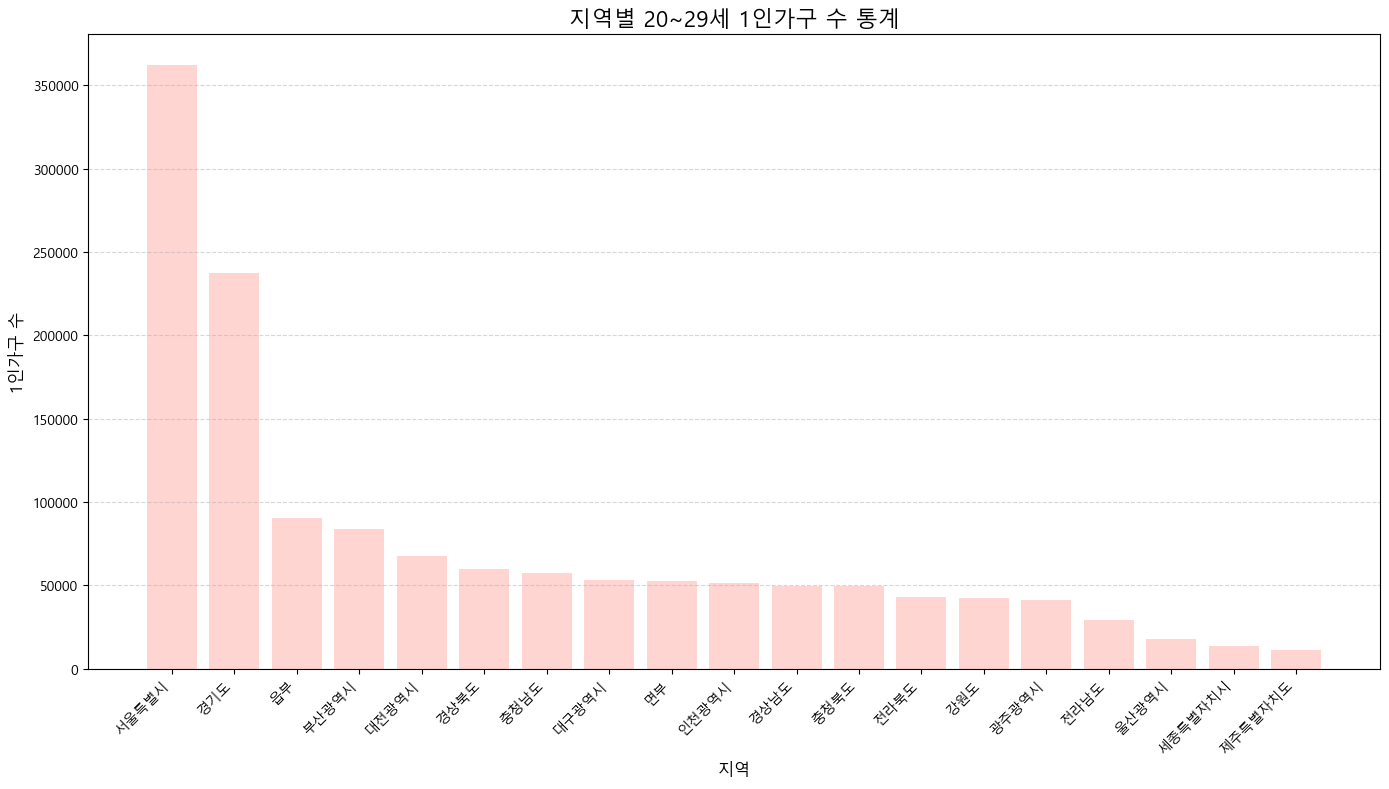

In [71]:
region_sum_sorted = region_sum.sort_values(by='1인가구', ascending=False)

plt.figure(figsize=(14, 8))
plt.bar(region_sum_sorted['지역'], region_sum_sorted['1인가구'], color='#FFD5D2')  # 연분홍색 지정

plt.title('지역별 20~29세 1인가구 수 통계', fontsize=16)
plt.xlabel('지역', fontsize=12)
plt.ylabel('1인가구 수', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
